In [1]:
#autoreload
%load_ext autoreload
%autoreload 2

import torch
from torchmetrics import AUROC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os

import sys
sys.path.append("../../src_clasificacion_vistas/common")

import pycimg

from pathlib import Path
import cv2
from tqdm import tqdm
import numpy as np
import gc
import shutil
from matplotlib.backends.backend_pdf import PdfPages
np.set_printoptions(precision=3, suppress=True)

In [2]:

def guess_labels(data,clases,out_dir):
    '''
    Para crear JSONS empleando las predicciones como anotaciones
    '''

    fig, axes=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios': [1, 2]})
    for d in tqdm(data):

        filenamenpz=d['filename']
        filenamejson=filenamenpz.replace(".npz",".json")
        filenamepng=filenamenpz.replace(".npz",".png")
        
        scores=d['scores']

        preds=[v for k,v in scores.items() if k in clases]
        gts=[int(p>0.5) for p in preds] ## IMPPRTANTE: Las etiquetas son las predicciones
        
        defectoss=[k for k,v in scores.items() if k in clases]
        

        npzfilename=filenamejson.replace(".json",".npz")
        npzfilename=os.path.join("..",npzfilename)
        filenamejson=os.path.join("..",filenamejson)
        print(f"filenamejson: {filenamejson}")
        with open(filenamejson, 'r') as f:
            json_data= json.load(f)

                
        bn=os.path.basename(filenamejson)
        bn=bn.replace(".json","")        
 
        # Copy png npz and json to out_dir
        
        target_json=os.path.join(out_dir,f"{os.path.basename(filenamejson)}")
        pngname=os.path.join("..",filenamepng)

        for k,clase in enumerate(clases):
            json_data['annotations'][clase]=str(int(gts[k]))
        with open(target_json, 'w') as f:
            json.dump(json_data, f, indent=4)
        axes[0].clear()
        axes[1].clear()
    plt.close(fig)


In [3]:
## Leer los archivos
test_results_json="../out_imagsSara/test_scores.json"


with open(test_results_json, "r") as f:
    test_dict = json.load(f)    

clases=list(test_dict['test_results'][0]['ground_truth'].keys())
test_data = test_dict['test_results']





548


  1%|▏         | 8/548 [00:00<00:06, 78.61it/s]

filenamejson: ../data/imgsSara/20250422decay/20250508_1658_000149.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1657_000142.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1658_000150.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1658_002134.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1658_000152.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1658_000146.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1658_000145.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1658_000147.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1658_000151.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1659_000153.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1657_002133.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1657_000143.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1657_000144.json
filenamejson: ../data/imgsSara/20250422decay/20250508_1658_000148.json
filena

  5%|▍         | 27/548 [00:00<00:06, 83.75it/s]

filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_002160.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_002156.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1721_002149.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_000199.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_000195.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_002155.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_000202.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_000191.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_002154.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1723_002162.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1721_000189.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1721_002150.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1723_000207.json
filenamejson

  7%|▋         | 39/548 [00:00<00:06, 74.65it/s]


filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_002159.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_000197.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_000203.json
filenamejson: ../data/imgsSara/20250422lightscars/20250508_1722_000193.json


FileNotFoundError: [Errno 2] No such file or directory: '../data/imgsSara/20250422lightscars/20250508_1722_000193.json'

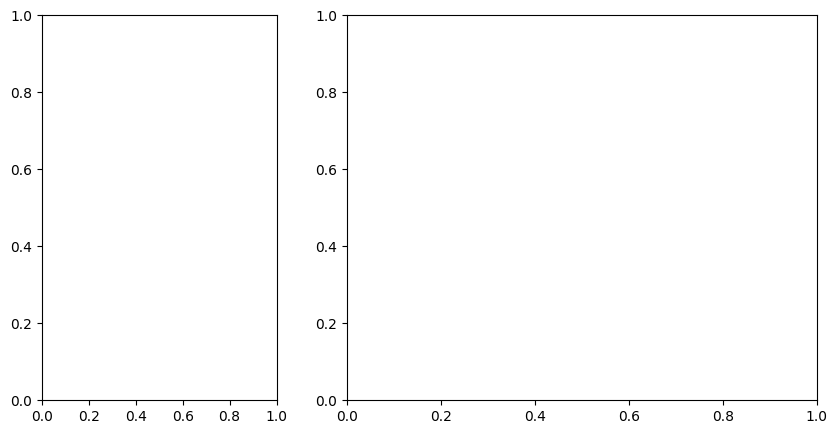

In [4]:
print(len(test_data))
out_dir="/home/aalbiol/Desktop/imgs_Sara_guess"
Path(out_dir).mkdir(parents=True, exist_ok=True)
guess_labels(test_data,clases,out_dir)